In [3]:
# hist_demo.ipynb
# 2020.12.20
# 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np

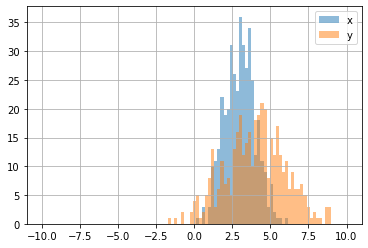

In [5]:
# https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib
import random
from matplotlib import pyplot

x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = np.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.grid(True)
pyplot.show()

In [8]:
d=pd.DataFrame(  {'x':x, 'y':y } )
d.shape

(400, 2)

<IPython.core.display.Javascript object>


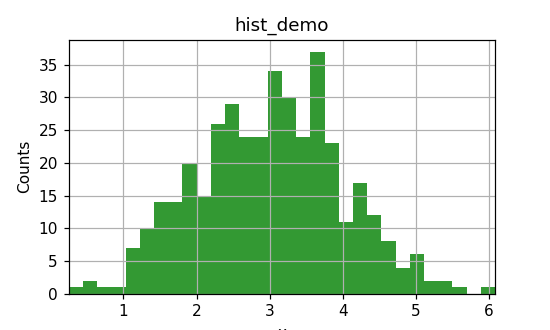

In [15]:
%matplotlib notebook  
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def plot_hist(d,col='x',TITLE='hist_demo', nbins=20):
#     fig, ax= plt.subplots(figsize=(10,5))
    fig = plt.figure(figsize=(5,3))
    x = d[col]
    n, bins, patches = plt.hist(x, nbins,  facecolor='g', alpha=0.8)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(TITLE)    
    # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.xlim(np.min(d[col]), np.max(d[col]))    # plt.ylim(0, 0.03)
    plt.grid(True)
    plt.show()
    
plot_hist(d,col='x',TITLE='hist_demo', nbins=30)

<IPython.core.display.Javascript object>


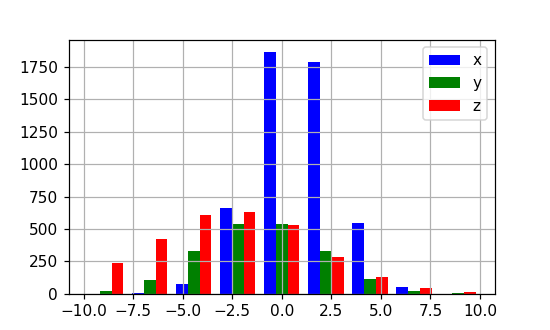

In [21]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))
plt.style.use('seaborn-deep')

x = np.random.normal(1, 2, 5000)
y = np.random.normal(-1, 3, 2000)
z = np.random.normal(-3, 4, 3000)
bins = np.linspace(-10, 10, 10)
colors = ['b','g','r']
plt.hist([x, y,z], bins, label=['x', 'y','z'],color=colors)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Multiple Density graphs in one plot

<IPython.core.display.Javascript object>


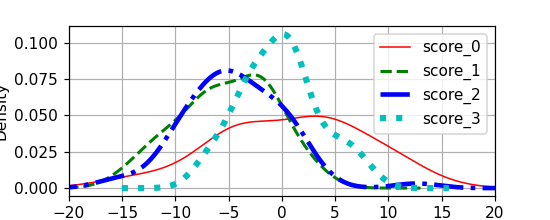

In [57]:
# https://stackoverflow.com/questions/43463438/how-to-plot-multiple-density-plots-on-the-same-figure-in-python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
for i in range(4):
    mean = 5-10*np.random.rand()
    std = 6*np.random.rand()
    df['score_{0}'.format(i)] = np.random.normal(mean, std, 60)

colors = ['r','g','b','c']    
linestyles = ['-', '--', '-.', ':']    
lwd = [1,2,3,4]
fig, ax = plt.subplots(1,1,figsize=(5,2))
for i in range(df.shape[1]):
# for s in df.columns:
    s = df.columns[i]
    df[s].plot(kind='density',linestyle=linestyles[i], color=colors[i], linewidth=lwd[i])
plt.xlim(-20, 20)    
plt.grid(True)
plt.legend(loc='upper right')
fig.show()

<IPython.core.display.Javascript object>


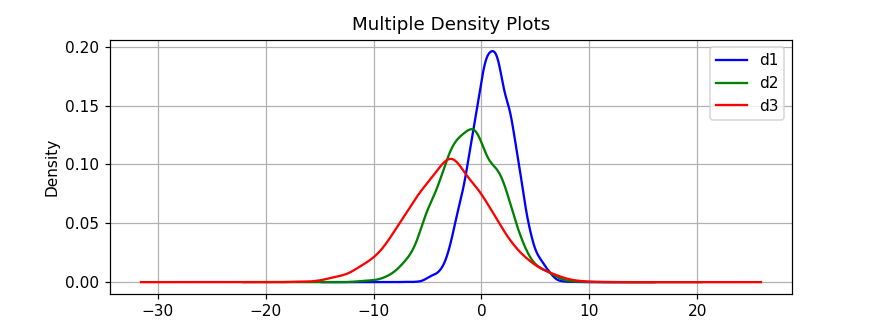

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d1 = pd.DataFrame({'x': np.random.normal(1, 2, 5000)})
d2 = pd.DataFrame({'x': np.random.normal(-1, 3, 2000)})
d3 = pd.DataFrame({'x': np.random.normal(-3, 4, 3000)})
d = [d1,d2,d3]
fig = plt.figure(figsize=(8,3))
plt.style.use('seaborn-deep')
colors = ['b','g','r']

for i in range(3):
    d[i]['x'].plot(kind='density',c=colors[i],label='d'+str(i+1))
plt.title('Multiple Density Plots')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


In [48]:
from scipy.stats import gaussian_kde
data=[1.5]*7
density = gaussian_kde(data)
density.covariance_factor


<bound method gaussian_kde.scotts_factor of <scipy.stats.kde.gaussian_kde object at 0x00000244BE8BDD30>>

<IPython.core.display.Javascript object>


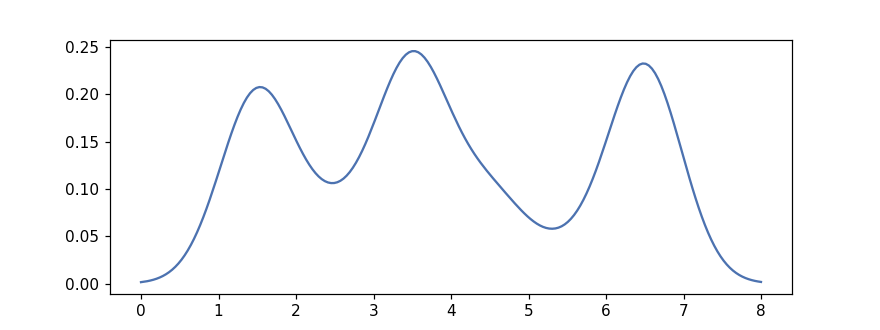

In [42]:
# https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

fig = plt.figure(figsize=(8,3))

data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8
density = gaussian_kde(data)
xs = np.linspace(0,8,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

# scipy.stats.gaussian_kde

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

## Representation of a kernel-density estimate using Gaussian kernels.

Kernel density estimation is a way to estimate the probability density function (PDF) of a random variable in a non-parametric way. gaussian_kde works for both uni-variate and multi-variate data. It includes automatic bandwidth determination. The estimation works best for a unimodal distribution; bimodal or multi-modal distributions tend to be oversmoothed.

<IPython.core.display.Javascript object>


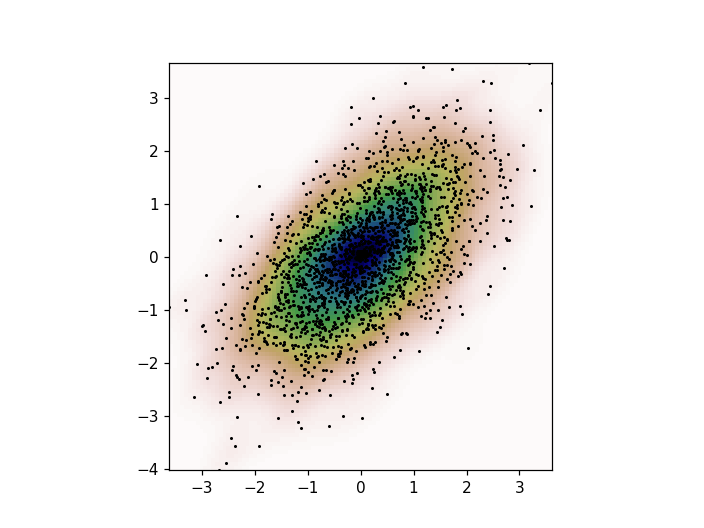

In [49]:
# Generate some random two-dimensional data:
from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

# Perform a kernel density estimate on the data:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

# Plot the results:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()
